In [1]:
%matplotlib inline
from __future__ import division, unicode_literals, print_function

# 0. Pythonとは
## 0.1. R / Matlabとの違い

Pythonはプログラミング言語の1つです．心理学講座で知られているRやMatlabの仲間です．<br>
さしあたり無料版Matlabのようなものですが，より広い用途で利用できるのが利点です．<br>
ただし，RやMatlabと違うポイントがいくつかあります．<br>

※ どちらかと言えばR / Matlabが特殊で，Python自体は至って普通のプログラミング言語です．

### 0.1.1. できること/できないこと (for Psychologist)

**Matlabの実験制作環境と比較して**

長所

* PTBよりPsychoPy (+ Jupyter) のほうがデバッグが容易．
    * 今日はこれを布教しにきました．と言い切れるぐらいおすすめ．
* タダで使えるうえ，セットアップが楽．ライセンス管理も不要．

短所

* サポートの電話とかメールは無い．

**Rのデータ分析環境と比較して**

長所

* 心理学者に必要な実験データの前処理と相性が良い．
    * 以下の作業を全て合わせても10行ちょっとで終わったりする．
        1. 生データ読み込み
        2. 被験者ID + 条件A, B, Cごとに正答率を算出
        3. 条件A, B, Cごとに平均正答率や標準誤差を再算出
    * 欠損値処理も簡単．
* 実験にも分析にも，あるいは他の用途にも使える．今後何を始めるにしてもその殆どはPythonだけで完結させられる．
    * 例: 機械学習 (ディープラーニング含む)，形態素解析，Webデータの自動収集，Webサイトづくり，等．
    * 参考: [科学計算における均質化、あるいはなぜPythonが着実に他言語のシェアを奪っているか](https://chezou.wordpress.com/2014/01/18/科学計算における均質化、あるいはなぜpythonが着実/)
    * とはいえ，後述の理由から，我々はRをサブウェポンとして持っておくべきだと思います．
* Pythonコミュニティはライブラリをコンパクトにまとめる傾向がある．
    * ほぼ全ての統計モデルはstatsmodelsにまとめられている．
    * ほぼ全ての機械学習モデルはscikit-learnにまとめられている．
    * 一方のRはライブラリが充実しているが故に統一感が無い．[e1071](https://www.google.co.jp/search?client=safari&rls=en&q=e1071&ie=UTF-8&oe=UTF-8&gfe_rd=cr&ei=tdiyWK2DCtSB1ASF4qygBg)とか一見何のライブラリかわからん…．


欠点

* 心理学者に必要な実験データの分析と相性が悪い．
    * RでできてPythonでできない分析はほとんど無いが，不幸にも，うち2つが心理学者と関わりの深い分析手法である．
        1. 分析分析
        2. (一般化) 線形混合モデル
    * これらを使う場合，前処理が済んだら，後はRに任せるべし．
    * または，PythonからRを呼び出す方法もある．
* 作図APIに癖がある．
    * 簡単な図の場合: Rよりずっと簡単．dat.plot(kind='bar')で群分けされた棒グラフが完成する (後述)．
    * 少し複雑な図の場合: Rと同程度 or ちょっと難しい．
    * 論文に載せられるレベルの図の場合: Rと同程度 (**ただし棒グラフは鬼門**)．
* 心理学界隈のPython使いはRと比較して少数派であり，心理学研究用のサンプルコードはそう多くない．
* Rのほうが直感的に書ける (代わりに，Pythonのほうが直感的に読める)．

言語の選定について，「[Pythonや機械学習、そして言語の競争について – 極めて主観的な見地から](http://postd.cc/python-machine-learning-and-language-wars-a-highly-subjective-point-of-view)」での引用の引用:

<blockquote>
私の大好きなPythonに関する言葉を元の文章から一部引用します。”みんな大人なんだからさ。”つまり、言語戦争で時間を無駄にするのはやめようということです。自分にピンとくるツールを選んで使ってください。
</blockquote>

### 0.1.2. 組み込みの機能

組み込みの機能だけでできることは限られます．
例えば，そのままでは平均を求めることさえできません．

In [2]:
x = [1, 2, 3]
mean(x)  # meanという関数はデフォルトでは存在しない．

NameError: name 'mean' is not defined

Pythonで何かをするには，それに対応したライブラリを読み込んで，その機能を使います．

In [3]:
import numpy as np  # 数値計算ライブラリ「numpy」を，npという名前で読み込んだ．
np.mean(x)

2.0

RやMatlabと違って，平均を求めるためには毎回**np.**meanと打ち込む必要があります．<br>
これは，関数の名前が衝突することのある汎用言語にとって必要なひと手間なので慣れるしかないです．

### 0.1.3. インデックス

もう1つの相違点は，インデックス指定が0始まりだということです．<br>
この機能も本当はちゃんと合理的なのですが，少なくとも直感的ではないです．慣れましょう．

In [4]:
x = ['one', 'two', 'three']
x[1]  # 1番目ではなく，2番目の要素が取り出される．

u'two'

## 0.2. 便利なライブラリ
### 0.2.1. NumPy
あまりに有名で使いやすい数値計算ライブラリ．Matlabの行列と似たような使い勝手です．

In [5]:
import numpy as np

In [6]:
x = np.array([[1, 2, 3],
              [4, 5, -6],
              [7, 8, 999]])

In [7]:
x * 10

array([[  10,   20,   30],
       [  40,   50,  -60],
       [  70,   80, 9990]])

In [8]:
x.min()

-6

In [9]:
np.absolute(x)

array([[  1,   2,   3],
       [  4,   5,   6],
       [  7,   8, 999]])

In [10]:
x >= 100

array([[False, False, False],
       [False, False, False],
       [False, False,  True]], dtype=bool)

### 0.2.2. Pandas
Excel表のようなデータフレームを扱うライブラリ．Rのdata.frameと似たような使い勝手です．

In [11]:
import pandas as pd

In [12]:
x = np.array([[15, 1, 160, 50],
              [18, 0, 165, 53],
              [22, 1, 174, 62],
              [45, 0, 158, 54],
              [48, 1, 170, 58]])

In [13]:
df = pd.DataFrame(x, index=['次男', '長女', '長男', '母', '父'],
                  columns=['年齢', '性別', '身長', '体重'])

In [14]:
df

,年齢,性別,身長,体重
次男,15,1,160,50
長女,18,0,165,53
長男,22,1,174,62
母,45,0,158,54
父,48,1,170,58


In [15]:
df.loc['父', '身長']  # location

170

In [16]:
df.iloc[0, 0]  # index location

15

In [17]:
df['身長']

次男    160
長女    165
長男    174
母     158
父     170
Name: 身長, dtype: int64

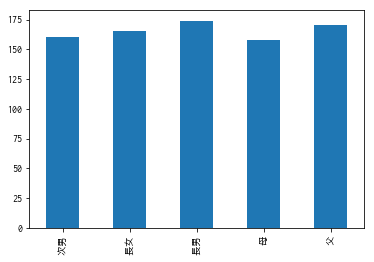

In [18]:
df['身長'].plot(kind='bar')

In [19]:
df.loc[df['性別'] == 1, :]

,年齢,性別,身長,体重
次男,15,1,160,50
長男,22,1,174,62
父,48,1,170,58


### 0.2.3. PsychoPy

誤解されがちですが，PsychoPy自体はただのライブラリです．

例えば「Matlab」は，「Matlabというソフト (開発環境)」と「Matlabという言語」の両方の意味があります．「Matlab言語」は本当にただの言語で，メモ帳で作って実行することもできるのですが，普通は「Matlabというソフト」を使って開発しています．

同様に，「PsychoPy」は，「PsychoPyという開発環境」と「PsychoPyというライブラリ」の両方の意味があります．おそらく，「Pythonで実験するためのライブラリを作ろうぜ！」と考えていた人が，そのうち，「せっかくだから楽々実験キットみたいなの作ろうぜ！」と思い始めて，PsychoPyというソフトが制作されたのだと思います．

そういうことなので，PsychoPyというソフトを使わなくてもPsychoPyというライブラリは使えます．以下に例を示します．

In [20]:
from psychopy import visual, core

In [21]:
win = visual.Window()  # 実験ウィンドウを開いて
core.wait(3)  # 3秒待ち
win.close()  # 閉じる

3.1965 	WARNING 	Monitor specification not found. Creating a temporary one...


PsychoPy Corderは開発環境として完全ではないです．補完機能とか弱いし．<br>
現時点で最も効率のよい実験プログラム作成の方法は，今使っているJupyter Notebookで刺激の見た目や挙動を随時デバッグしながら作業を進めていくことだと思います．

## 0.3. 開発環境
今回は複数の開発環境を用います．

### 0.3.1. Jupyter Notebook

今使っているものです．
おそらくPythonで何かをするにあたって最も便利です．ついでにRも使えます．その気に慣ればMatlabとかOctaveも使えるるらしいです．

### 0.3.2. PsychoPy Builder / Corder

PsychoPyのプログラムを実行するときに (だけ) 使います (が，別に使わなくてもいけます)．

## 0.4. バージョン問題
Pythonには「2系」と「3系」があります．3系は色々と後方互換性が切り捨てられています．残念ながら2系のみサポートしているPsychoPyは3系では動きません．実は「3系をベースとして必要に応じて2系を使う」という方法もありますが (自分はそうしていますが)，とりあえず今回は2系を使うことにします．